# Hello and welcome to my Notebook

#### Today we will explore the world of taxis using this dataset and understand what goes into predicting the prices for taxis when we try to book them and how historical data can play a role in making better and accurate predictions. 

#### We will understand the dataset then move to creating visuals to better that understanding. We will use statistical methods to know nature of dataset and fix missing values or outliers effecting our data. After that we will build different models and pick the one that works best for our data.

In [1]:
# Loading libraries

import numpy as np # linear algebra
import pandas as pd # to handle and read datasets
import datetime # to handle time and date data
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

# Print path to files stored here in kaggle database
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv


In [2]:
# Let us read the data from train.csv file
train_data = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')
test_data = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')

In [3]:
# We will start with inspecting the data
print(train_data.shape) # dataset contains 1,75,000 rows and 17 columns with target_amount as the 'y'
train_data.head(5)

(175000, 17)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


In [4]:
# Inspecting the test.csv on which we will make the predictions
print(test_data.shape) # dataset contains 50,000 rows and 16 columns
test_data.head(5)

(50000, 16)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
0,1,2023-06-29 00:21:20,2023-06-29 00:25:20,1.0,4.95,1.0,N,20,3,Credit Card,1.0,6.067612,0.0,1.0,2.5,0.0
1,1,2023-06-30 17:44:43,2023-06-30 17:53:13,1.0,2.10,1.0,N,9,81,Credit Card,2.5,6.191269,0.0,1.0,2.5,0.0
2,1,2023-06-29 18:17:04,2023-06-29 19:23:48,1.0,0.95,1.0,N,92,90,Cash,2.5,3.983872,0.0,1.0,2.5,0.0
3,0,2023-06-30 21:33:53,2023-06-30 21:46:20,1.0,0.80,1.0,N,19,102,Credit Card,3.5,6.839341,0.0,1.0,2.5,0.0
4,1,2023-06-29 14:53:54,2023-06-29 15:22:17,1.0,4.01,1.0,N,131,229,Cash,0.0,1.468943,0.0,1.0,0.0,0.0


In [5]:
# From understanding of the dataset and description focus will be on predicting the total_amount.
# Before we get onto that let us understand the dataset more.
print("Columns: ", train_data.columns.values)
print(train_data.info()) # We can see that passenger_count, RatecodeID, store_and_fwd_flag, congestion_surcharge, Airport_fee have 6077 null values each

# We can observe that pickup_datetime and dropoff_datetime will need to be converted to datetime datatype and 
# payment_type and store_and_fwd_flag will need to be encoded into categories

Columns:  ['VendorID' 'tpep_pickup_datetime' 'tpep_dropoff_datetime'
 'passenger_count' 'trip_distance' 'RatecodeID' 'store_and_fwd_flag'
 'PULocationID' 'DOLocationID' 'payment_type' 'extra' 'tip_amount'
 'tolls_amount' 'improvement_surcharge' 'total_amount'
 'congestion_surcharge' 'Airport_fee']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   pa

### From the analysis and the problem statement we can divide the columns into
#### Features
1. VendorID
2. tpep_pickup_datetime
3. tpep_dropoff_datetime
4. passenger_count
5. trip_distance
6. RatecodeID
7. store_and_fwd_flag
8. PULocationID
9. DOLocationID
10. payment_type
11. extra
12. tip_amount
13. tolls_amount
14. improvement_surcharge
15. congestion_surcharge
16. Airport_fee

#### Label
1. total_amount

In [6]:
print("Columns: ", test_data.columns.values)
print(test_data.info()) # We can see that passenger_count, RatecodeID, store_and_fwd_flag, congestion_surcharge, Airport_fee have 1799 null values each

Columns:  ['VendorID' 'tpep_pickup_datetime' 'tpep_dropoff_datetime'
 'passenger_count' 'trip_distance' 'RatecodeID' 'store_and_fwd_flag'
 'PULocationID' 'DOLocationID' 'payment_type' 'extra' 'tip_amount'
 'tolls_amount' 'improvement_surcharge' 'congestion_surcharge'
 'Airport_fee']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               50000 non-null  int64  
 1   tpep_pickup_datetime   50000 non-null  object 
 2   tpep_dropoff_datetime  50000 non-null  object 
 3   passenger_count        48221 non-null  float64
 4   trip_distance          50000 non-null  float64
 5   RatecodeID             48221 non-null  float64
 6   store_and_fwd_flag     48221 non-null  object 
 7   PULocationID           50000 non-null  int64  
 8   DOLocationID           50000 non-null  int64  
 9   payment_type           50000 n

In [7]:
# Let us understand the nature of train data
train_data.describe()

# Few observations - It seems trip distance's max value is way too high reaching 135182 which seems abnormal, tip amount also reaches 484 and total amount has large negative value also.
# Improvement surcharge, extra, tolls_amount, congestion_surcharge and airport fee also has negative values.

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,175000.000000,168923.000000,175000.000000,168923.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,168923.000000,168923.000000
mean,0.728377,1.357678,5.145930,1.518307,132.710349,132.701429,1.932143,6.127497,0.646816,0.979689,29.633901,2.246971,0.158825
std,0.445606,0.891283,394.971052,6.514678,76.148799,76.192493,1.948497,4.610834,2.328274,0.198775,25.425206,0.819216,0.511968
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000079,-29.300000,-1.000000,-576.750000,-2.500000,-1.750000
25%,0.000000,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.473321,0.000000,1.000000,16.300000,2.500000,0.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,133.000000,1.000000,5.286217,0.000000,1.000000,21.450000,2.500000,0.000000
75%,1.000000,1.000000,3.610000,1.000000,199.000000,199.000000,2.500000,7.502746,0.000000,1.000000,31.800000,2.500000,0.000000
max,2.000000,9.000000,135182.060000,99.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,587.250000,2.500000,1.750000


In [8]:
# Similarly inspecting the nature of test data
test_data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
count,50000.000000,48221.000000,50000.000000,48221.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,48221.000000,48221.000000
mean,0.730280,1.358309,3.999013,1.567014,132.208160,132.559300,1.918050,6.107765,0.615867,0.981354,2.255345,0.152133
std,0.444584,0.879948,78.958759,6.875115,76.483766,76.410602,1.938568,4.408572,2.289421,0.190203,0.803190,0.502866
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000409,-23.000000,-1.000000,-2.500000,-1.750000
25%,0.000000,1.000000,1.090000,1.000000,66.000000,67.000000,0.000000,3.464018,0.000000,1.000000,2.500000,0.000000
50%,1.000000,1.000000,1.850000,1.000000,132.000000,133.000000,1.000000,5.271687,0.000000,1.000000,2.500000,0.000000
75%,1.000000,1.000000,3.600000,1.000000,199.000000,199.000000,2.500000,7.504048,0.000000,1.000000,2.500000,0.000000
max,2.000000,8.000000,17624.430000,99.000000,264.000000,264.000000,11.750000,96.551343,47.750000,1.000000,2.500000,1.750000


## Visualizing Data
Now we will look at the data and visualize it to understand more about the data and relationship between features

{'whiskers': [<matplotlib.lines.Line2D at 0x7ca751d514b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ca751d50100>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ca751d52ec0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ca751d50a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ca751d533a0>],
 'means': []}

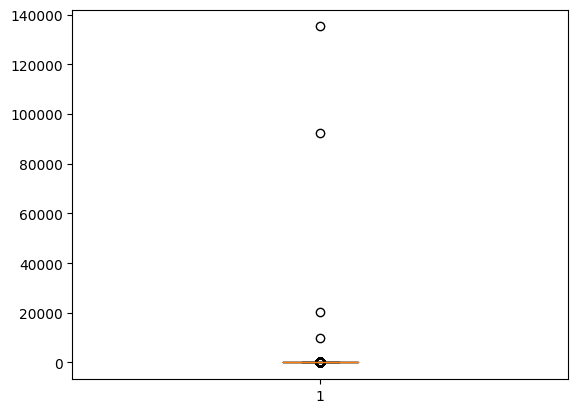

In [9]:
plt.boxplot(train_data['trip_distance'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ca751b023e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ca751b03e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ca751b02140>],
 'medians': [<matplotlib.lines.Line2D at 0x7ca751b02bc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ca751b02f80>],
 'means': []}

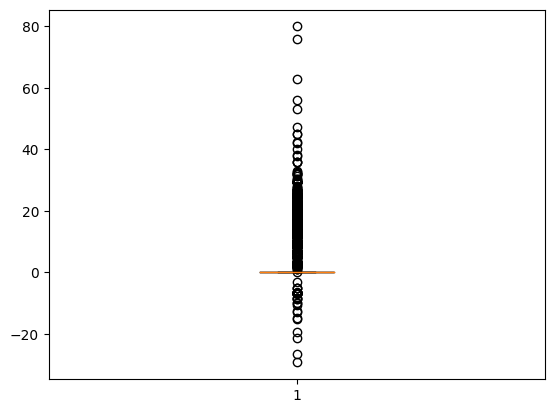

In [10]:
plt.boxplot(train_data['tolls_amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ca74fb2d9c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ca74fb2df00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ca74fb2d720>],
 'medians': [<matplotlib.lines.Line2D at 0x7ca74fb2e440>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ca74fb2e6e0>],
 'means': []}

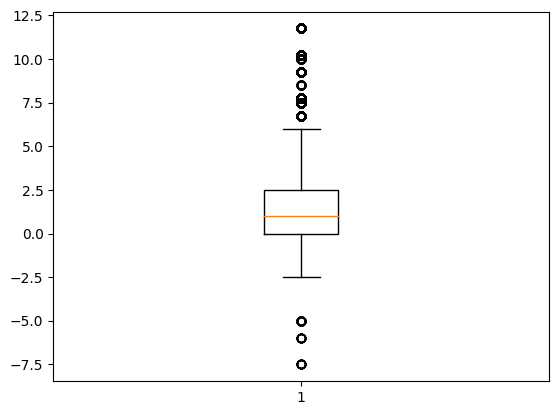

In [11]:
plt.boxplot(train_data['extra'])

## Feature Transformation
Pickup time and Dropoff time can give us very good information
1. Information on trip duration by taking difference of dropoff and pickup time
2. Time of day when trip was started and ended also may have some correlation to the prices charged
3. We can use duration to calculate speed of travel as we have the trip distance. It can give us idea of whether traffic or waiting times have correlation to charges. Slow average speeds could mean more overall charges.

train_data.payment_type.value_counts()

In [12]:
# Converting datetime strings to datetime objects in both train and test data
train_data.tpep_pickup_datetime = pd.to_datetime(train_data.tpep_pickup_datetime)
train_data.tpep_dropoff_datetime = pd.to_datetime(train_data.tpep_dropoff_datetime)

# Doing the same for test set
test_data.tpep_pickup_datetime = pd.to_datetime(test_data.tpep_pickup_datetime)
test_data.tpep_dropoff_datetime = pd.to_datetime(test_data.tpep_dropoff_datetime)

In [13]:
# calculating the duration of trip and converting to minutes using datetime.timedelta.total_seconds
train_data['trip_duration'] = pd.DataFrame(map(datetime.timedelta.total_seconds,(train_data.tpep_dropoff_datetime - train_data.tpep_pickup_datetime)))/60

# Performing same for test data
test_data['trip_duration'] = pd.DataFrame(map(datetime.timedelta.total_seconds,(test_data.tpep_dropoff_datetime - test_data.tpep_pickup_datetime)))/60

In [14]:
print("Train Data negative trip durations", train_data.trip_duration[train_data.trip_duration<0].count())
# Strangely in 65674 cases time duration is negative

print("Test Data negative trip durations", test_data.trip_duration[test_data.trip_duration<0].count())
# Similarly in 18578 cases time duration is negative

Train Data negative trip durations 65674
Test Data negative trip durations 18578


In [15]:
# Replacing the negative values by positive values by reversing the signs for them.
train_data.loc[train_data['trip_duration'] < 0,'trip_duration'] = train_data.loc[train_data['trip_duration'] < 0,'trip_duration']*(-1)

# Repeating same for the test data values
test_data.loc[test_data['trip_duration'] < 0,'trip_duration'] = test_data.loc[test_data['trip_duration'] < 0,'trip_duration']*(-1)

In [16]:
# Performing a quick check to see the transformations were ok
train_data['trip_duration'].describe()

count    175000.000000
mean         44.570096
std          47.014730
min           0.000000
25%          17.800000
50%          37.933333
75%          64.250000
max        1537.150000
Name: trip_duration, dtype: float64

In [17]:
# Extracting time of the day only the hour from datetime data for pickup and dropoff

train_data['pick_time_of_day'] = train_data['tpep_pickup_datetime'].dt.hour
train_data['drop_time_of_day'] = train_data['tpep_dropoff_datetime'].dt.hour

# Performing same for test data
test_data['pick_time_of_day'] = test_data['tpep_pickup_datetime'].dt.hour
test_data['drop_time_of_day'] = test_data['tpep_dropoff_datetime'].dt.hour

In [18]:
# Checking once again whether all the transformations worked fine
train_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,trip_duration,pick_time_of_day,drop_time_of_day
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0,45.600000,17,16
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0,63.433333,23,22
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0,53.650000,10,11
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0,56.866667,13,14
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0,18.833333,22,22


In [19]:
test_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,trip_duration,pick_time_of_day,drop_time_of_day
0,1,2023-06-29 00:21:20,2023-06-29 00:25:20,1.0,4.95,1.0,N,20,3,Credit Card,1.0,6.067612,0.0,1.0,2.5,0.0,4.000000,0,0
1,1,2023-06-30 17:44:43,2023-06-30 17:53:13,1.0,2.10,1.0,N,9,81,Credit Card,2.5,6.191269,0.0,1.0,2.5,0.0,8.500000,17,17
2,1,2023-06-29 18:17:04,2023-06-29 19:23:48,1.0,0.95,1.0,N,92,90,Cash,2.5,3.983872,0.0,1.0,2.5,0.0,66.733333,18,19
3,0,2023-06-30 21:33:53,2023-06-30 21:46:20,1.0,0.80,1.0,N,19,102,Credit Card,3.5,6.839341,0.0,1.0,2.5,0.0,12.450000,21,21
4,1,2023-06-29 14:53:54,2023-06-29 15:22:17,1.0,4.01,1.0,N,131,229,Cash,0.0,1.468943,0.0,1.0,0.0,0.0,28.383333,14,15


In [20]:
# Since there are seperate amounts also mentioned we will calculate and keep net_amount = total_amount -extra -tip_amount -tolls_amount -improvement_surcharge -congestion_surcharge -Airport_fee

train_data['net_amount'] = train_data['total_amount']-train_data['extra']-train_data['tip_amount']-train_data['tolls_amount']-train_data['improvement_surcharge']-train_data['congestion_surcharge']-train_data['Airport_fee']
train_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,trip_duration,pick_time_of_day,drop_time_of_day,net_amount
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,...,7.165589,0.0,1.0,20.64,2.5,0.0,45.600000,17,16,7.474411
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,...,6.067401,0.0,1.0,25.55,2.5,0.0,63.433333,23,22,12.482599
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,...,4.111547,0.0,1.0,17.64,2.5,0.0,53.650000,10,11,10.028453
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,...,6.411079,0.0,1.0,12.80,2.5,0.0,56.866667,13,14,0.388921
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,...,4.769377,0.0,1.0,18.00,2.5,0.0,18.833333,22,22,8.730623


In [21]:
# test_data['net_amount'] = train_data['total_amount']-train_data['extra']-train_data['tip_amount']-train_data['tolls_amount']-train_data['improvement_surcharge']-train_data['congestion_surcharge']-train_data['Airport_fee']
# train_data.head()

In [22]:
# We will need to convert the labels to numerical before we can use KNN imputer
from sklearn.preprocessing import OrdinalEncoder
oe_1 = OrdinalEncoder()
oe_2 = OrdinalEncoder()
oe_3 = OrdinalEncoder()
oe_4 = OrdinalEncoder()
train_data['store_and_fwd_flag'] = oe_1.fit_transform(train_data['store_and_fwd_flag'].values.reshape(-1,1))
train_data['store_and_fwd_flag'].unique()

train_data['payment_type'] = oe_2.fit_transform(train_data['payment_type'].values.reshape(-1,1))

test_data['store_and_fwd_flag'] = oe_3.fit_transform(test_data['store_and_fwd_flag'].values.reshape(-1,1))
test_data['store_and_fwd_flag'].unique()

test_data['payment_type'] = oe_4.fit_transform(test_data['payment_type'].values.reshape(-1,1))
train_data['store_and_fwd_flag'].unique(),train_data['payment_type'].unique(),test_data['store_and_fwd_flag'].unique(),test_data['payment_type'].unique()
oe_1.categories_,oe_2.categories_,oe_3.categories_,oe_4.categories_

([array(['N', 'Y', nan], dtype=object)],
 [array(['Cash', 'Credit Card', 'UPI', 'Wallet', 'unknown'], dtype=object)],
 [array(['N', 'Y', nan], dtype=object)],
 [array(['Cash', 'Credit Card', 'UPI', 'Wallet', 'unknown'], dtype=object)])

In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               175000 non-null  int64         
 1   tpep_pickup_datetime   175000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  175000 non-null  datetime64[ns]
 3   passenger_count        168923 non-null  float64       
 4   trip_distance          175000 non-null  float64       
 5   RatecodeID             168923 non-null  float64       
 6   store_and_fwd_flag     168923 non-null  float64       
 7   PULocationID           175000 non-null  int64         
 8   DOLocationID           175000 non-null  int64         
 9   payment_type           175000 non-null  float64       
 10  extra                  175000 non-null  float64       
 11  tip_amount             175000 non-null  float64       
 12  tolls_amount           175000 non-null  floa

## Some more Graphs to understand calculated fields

## Missing Value Treatment

In [24]:
# Using KNNImputer to fill in the filling missing values with n_neighbors = 5

imputer_1 = KNNImputer(n_neighbors=5)
train_data_knn = imputer_1.fit_transform(train_data.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'],axis=1))
train_data_knn

array([[ 1.        ,  1.        ,  2.14      , ..., 17.        ,
        16.        ,  7.47441139],
       [ 0.        ,  1.        ,  2.7       , ..., 23.        ,
        22.        , 12.4825992 ],
       [ 1.        ,  1.        ,  1.15      , ..., 10.        ,
        11.        , 10.02845251],
       ...,
       [ 0.        ,  1.        ,  2.4       , ..., 11.        ,
        12.        , 23.25464613],
       [ 1.        ,  1.        ,  4.71      , ..., 19.        ,
        19.        , 24.32022368],
       [ 1.        ,  1.        ,  1.01      , ..., 21.        ,
        22.        ,  5.27830122]])

In [25]:
# Using KNNImputer to fill in the filling missing values with n_neighbors = 5
imputer_2 = KNNImputer(n_neighbors=5)
test_data_knn = imputer_2.fit_transform(test_data.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'],axis=1))
test_data_knn

array([[ 1.        ,  1.        ,  4.95      , ...,  4.        ,
         0.        ,  0.        ],
       [ 1.        ,  1.        ,  2.1       , ...,  8.5       ,
        17.        , 17.        ],
       [ 1.        ,  1.        ,  0.95      , ..., 66.73333333,
        18.        , 19.        ],
       ...,
       [ 1.        ,  1.        ,  1.92      , ..., 39.11666667,
        22.        , 21.        ],
       [ 0.        ,  1.        ,  5.4       , ..., 26.75      ,
         2.        ,  2.        ],
       [ 1.        ,  1.        ,  1.31      , ..., 49.98333333,
        18.        , 17.        ]])

In [26]:
# creating a dataframe back from the output of the KNNImputer
train_data_copy = train_data.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'],axis=1)
train_data_copy.iloc[:,:] = pd.DataFrame(train_data_knn)
train_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  float64
 1   passenger_count        175000 non-null  float64
 2   trip_distance          175000 non-null  float64
 3   RatecodeID             175000 non-null  float64
 4   store_and_fwd_flag     175000 non-null  float64
 5   PULocationID           175000 non-null  float64
 6   DOLocationID           175000 non-null  float64
 7   payment_type           175000 non-null  float64
 8   extra                  175000 non-null  float64
 9   tip_amount             175000 non-null  float64
 10  tolls_amount           175000 non-null  float64
 11  improvement_surcharge  175000 non-null  float64
 12  total_amount           175000 non-null  float64
 13  congestion_surcharge   175000 non-null  float64
 14  Airport_fee            175000 non-nu

In [27]:
# creating a dataframe back from the output of the KNNImputer
test_data_copy = test_data.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'],axis=1)
test_data_copy.iloc[:,:] = pd.DataFrame(test_data_knn)
test_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               50000 non-null  float64
 1   passenger_count        50000 non-null  float64
 2   trip_distance          50000 non-null  float64
 3   RatecodeID             50000 non-null  float64
 4   store_and_fwd_flag     50000 non-null  float64
 5   PULocationID           50000 non-null  float64
 6   DOLocationID           50000 non-null  float64
 7   payment_type           50000 non-null  float64
 8   extra                  50000 non-null  float64
 9   tip_amount             50000 non-null  float64
 10  tolls_amount           50000 non-null  float64
 11  improvement_surcharge  50000 non-null  float64
 12  congestion_surcharge   50000 non-null  float64
 13  Airport_fee            50000 non-null  float64
 14  trip_duration          50000 non-null  float64
 15  pi

## Find and Treat Outliers

## Scaling Features

## Splitting the train_data

In [28]:
X = train_data_copy.drop(['total_amount','net_amount'],axis=1)
y = train_data_copy['total_amount']

In [29]:
# splitting the data for training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building
### Linear Model

In [30]:
# first base model using DummyRegressor
from sklearn.dummy import DummyRegressor

dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train,y_train)
dummy_regr.predict(X_test)
dummy_regr.score(X_test,y_test)

-3.7584352301278656e-05

In [31]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)
linear_regressor.predict(X_test)
linear_regressor.score(X_test,y_test)

0.7193851055621647

In [32]:
linear_regressor.coef_

array([ 4.11650484e-01,  5.16776915e-01, -2.07510686e-05,  1.07430184e-01,
        4.26869127e-01,  7.09569131e-04, -5.86185654e-05, -8.58386694e-01,
       -2.29322757e-01,  2.00911091e+00,  4.37631886e+00,  2.52041895e+01,
       -2.73712367e+00,  1.29186246e+01,  1.95993921e-02,  4.42266997e-02,
        8.75746217e-03])

In [33]:
submission = linear_regressor.predict(test_data_copy)
my_submission = pd.DataFrame({'ID': range(1,50001), 'total_amount': submission})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

### Testing Linear Model

In [34]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=50)
regr.fit(X_train,y_train)
regr.predict(X_test)
regr.score(X_test,y_test)

# 100 estimators - 0.9583965044644674
# 1000 estimators - 0.9583448385695726

0.957257139166418

In [35]:
submission = regr.predict(test_data_copy)
my_submission = pd.DataFrame({'ID': range(1,50001), 'total_amount': submission})
# you could use any filename. We choose submission here
my_submission.to_csv('submission_2.csv', index=False)